In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

In [11]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url, header=0, parse_dates=[0], index_col=0)
print(df.head())
print("--------------------------------")
print(df.info())
data = df.values
data = data.astype('float32')


scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data.reshape(-1, 1))
data.shape

            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
--------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB
None


(144, 1)

In [3]:
seq_size = 12 


X = []
y = []


for i in range(seq_size, len(data)):
    X.append(data[i-seq_size:i, 0]) 
    y.append(data[i, 0])


X = np.array(X)
y = np.array(y)


X = np.reshape(X, (X.shape[0], X.shape[1], 1))
X.shape

(132, 12, 1)

In [4]:
split = 100


X_train = X[:split]
y_train = y[:split]


X_test = X[split:]
y_test = y[split:]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((100, 12, 1), (100,), (32, 12, 1), (32,))

In [5]:
model = Sequential()
model.add(LSTM(50, activation='tanh', input_shape=(seq_size, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


model.summary()

/opt/anaconda3/envs/ml-env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=0)
# Letting verbrose = 0, in order to suppress the output. If you would like to see it, set verbose =1.

In [7]:
y_pred = model.predict(X_test)


mse = ((y_pred - y_test)**2).mean(axis=0)
print(f'Test MSE: {mse}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Test MSE: [0.01715357 0.02057997 0.04995894 0.06095598 0.0143679  0.01809616
 0.03932164 0.02541223 0.01784934 0.02343271 0.01455253 0.01392756
 0.01667969 0.03737109 0.10386711 0.11705808 0.03234759 0.01465602
 0.01737803 0.01445649 0.01610088 0.01389459 0.01647929 0.03131327
 0.03737109 0.0894405  0.20998104 0.18357903 0.06350252 0.03131327
 0.01391036 0.01966574]


In [12]:
print(y_pred.shape)
print(y_test.shape)

(32, 1)
(32,)


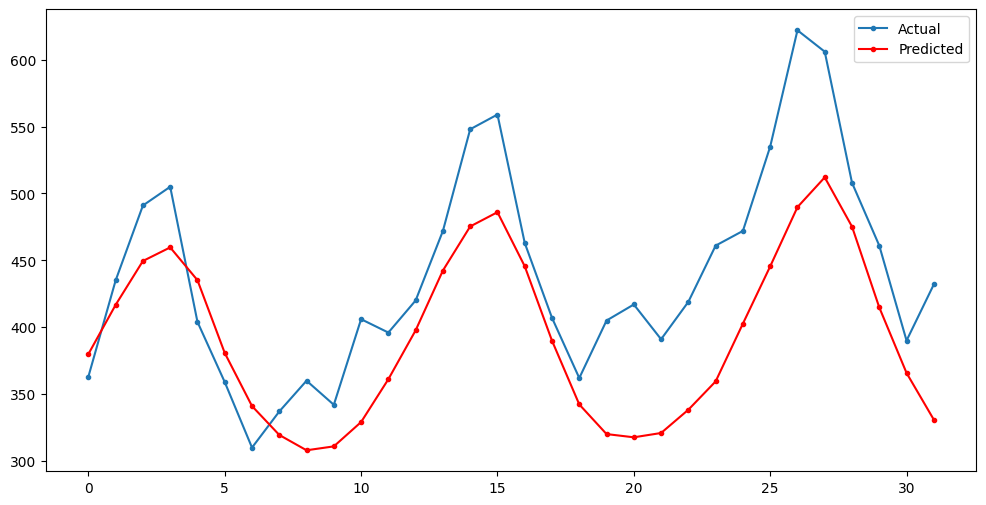

In [9]:
y_pred_inv = scaler.inverse_transform(y_pred) 
y_test_inv = scaler.inverse_transform([y_test])


plt.figure(figsize=(12,6))
plt.plot(y_test_inv.flatten(), marker='.', label="Actual")
plt.plot(y_pred_inv.flatten(), 'r', marker='.', label="Predicted")
plt.legend()
plt.show()